In [4]:
## 행과열 다루는 라이브러리
import pandas as pd
import numpy as np

## 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

### 머신러닝 데이터 전처리 데이터 분리 라이브러리
from sklearn.model_selection import train_test_split

##

In [6]:
featuresUrl = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/feature_regression_example.csv"
featuresData = pd.read_csv( featuresUrl )

### 1. 데이터 타입 통합 및 특성 숫자컬럼 추가

In [9]:
### 데이터타입 통합 skip

In [10]:
ynDict = {"Y":1,"N":0}

In [13]:
featuresData["PREP_HOLIDAY"] = featuresData.HOLIDAY.map(ynDict)
featuresData["PREP_PROMOTION"] = featuresData.PROMOTION.map(ynDict)

### 2. 데이터 분리

In [22]:
label = ["QTY"]
features = list( featuresData.select_dtypes( np.number ).columns )
features.remove( label[0] )

In [55]:
features

['YEARWEEK',
 'YEAR',
 'WEEK',
 'HCLUS',
 'PRO_PERCENT',
 'PREP_HOLIDAY',
 'PREP_PROMOTION']

In [33]:
trainData, testData = train_test_split(featuresData, test_size=0.2, random_state=1)

In [34]:
trainingDataFeatures = trainData.loc[ :, features]
trainingDataLabel = trainData.loc[ :, label]
testDataFeatures = testData.loc[ :, features]
testDataLabel = testData.loc[ :, label]

In [35]:
print(trainingDataFeatures.shape)
print(trainingDataLabel.shape)
print(testDataFeatures.shape)
print(testDataLabel.shape)

(84, 7)
(84, 1)
(21, 7)
(21, 1)


### 3. 모델 생성

In [46]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [43]:
inputShape = trainingDataFeatures.loc[83].shape

In [54]:
unitSize = 32

In [44]:
model = Sequential()
# 입력레이어 (inputLayer, *히든레이어 포함)
model.add(Dense(units=unitSize, activation="relu", input_shape=inputShape))

# 히든레이어
model.add(Dense(units=unitSize, activation="relu"))

# 출력레이어
model.add(Dense(units=unitSize, activation="relu"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

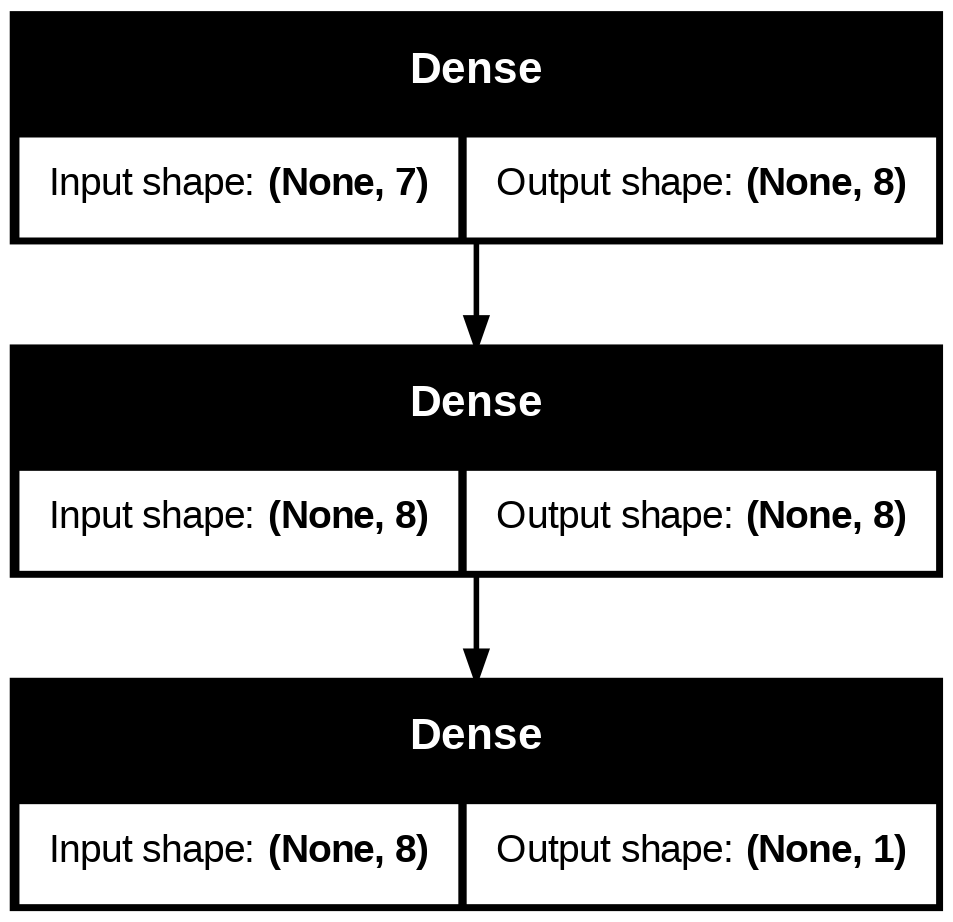

In [48]:
plot_model(model, show_shapes=True)

### 4. 모델 컴파일 (교수/손실함수 매핑)

In [51]:
model.compile( optimizer="adam",
               loss="mean_squared_error",
               metrics=["mean_absolute_error"])

### 5. 모델 학습

In [52]:
trainingDataFeatures.shape

(84, 7)

In [53]:
model.fit( trainingDataFeatures,
           trainingDataLabel,
           epochs=1000,
           batch_size=32,
           validation_split=0.2)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - loss: 2337655.0000 - mean_absolute_error: 1251.9714 - val_loss: 1395028.0000 - val_mean_absolute_error: 1000.2941
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2435992.0000 - mean_absolute_error: 1273.4871 - val_loss: 1395028.0000 - val_mean_absolute_error: 1000.2941
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2299630.0000 - mean_absolute_error: 1272.2957 - val_loss: 1395028.0000 - val_mean_absolute_error: 1000.2941
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2296072.0000 - mean_absolute_error: 1248.8347 - val_loss: 1395028.0000 - val_mean_absolute_error: 1000.2941
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2257718.7500 - mean_absolute_error: 1226.5808 - val_loss: 1395028.0000 - val_mean_absolute_error: 1000.2941
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2064550.5000 - mean_absolute_error: 1198.3582 - val_loss: 1395028.0000 - val_mean_absolute_error: 1000.29

### 6. 모델 추론

### 7. 모델 예측